In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [4]:
loss_data = pickle.load(open('loss_record.txt', 'rb'))

In [23]:
data = pd.DataFrame(map(list,zip(*[range(len(loss_data)),loss_data])), columns=["Iteration", "Loss"])
data

,Iteration,Loss
0,0,0.702165
1,1,0.673104
2,2,0.697387
3,3,0.685366
4,4,0.686738
...,...,...
1150,1150,0.434782
1151,1151,0.621582
1152,1152,0.461281
1153,1153,0.578761


In [103]:
def plot_data(data, window=5):
    data["Moving Average Loss"] = data["Loss"].rolling(window).mean()
    
    # Figure
    fig = plt.figure()
    ax = plt.axes()
    
    ax.scatter(data["Iteration"], data["Loss"], color="#FFE366", label="Loss")
    ax.plot(data["Iteration"], data["Moving Average Loss"], color="#3C3C3C", label="Loss Moving Average")
    
    ax.set_xlim([window, max(data["Iteration"]) - 10])
    ax.set_ylim([0, 1])
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
#     ax.set_aspect(aspect=2)
#     ax.set_title("Loss")
    ax.set_xlabel('Iteration')
#     ax.set_ylabel('Loss')
    ax.legend()
    
    return data, fig
    

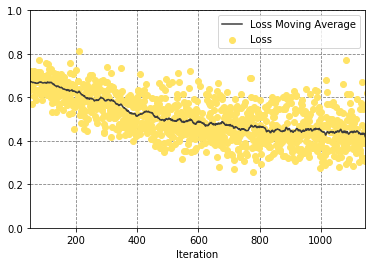

In [104]:
window=50
_, fig = plot_data(data, window=window)
fig.savefig("loss" + ".svg", format="svg")